# Análisis de Datos de Ventas de Videojuegos para la Tienda Online Ice

## Introducción

Este proyecto se realiza en el contexto del curso de análisis de datos de la plataforma TripleTen y se lleva a cabo utilizando JupyterHub. Trabajamos para la tienda online Ice, que se especializa en la venta de videojuegos a nivel global. Nuestro objetivo principal es identificar patrones que determinan el éxito de un videojuego. Esta información es crucial para detectar proyectos prometedores y planificar campañas publicitarias efectivas.



## Descripción del Proyecto
La tienda Ice ha recopilado datos históricos de ventas de videojuegos, que incluyen reseñas de usuarios y expertos, géneros, plataformas (como Xbox o PlayStation) y clasificaciones de la Entertainment Software Rating Board (ESRB). Estos datos se remontan hasta el año 2016, y nuestra tarea es analizar estos datos como si estuviéramos en diciembre de 2016, con el fin de planificar las estrategias para el año 2017.

## Objetivos


### Los objetivos específicos del proyecto son los siguientes:

#### Preparar y limpiar los datos:

- Reemplazar los nombres de las columnas para estandarizar el formato.
- Convertir los tipos de datos a los formatos apropiados.
- Manejar valores ausentes de manera lógica y justificada.


#### Análisis Exploratorio de Datos (EDA):

- Evaluar la cantidad de juegos lanzados en diferentes años.
- Analizar la variación de ventas entre diferentes plataformas.
- Identificar las plataformas con mayores ventas y sus tendencias a lo largo del tiempo.
- Determinar el período relevante de datos para construir un modelo predictivo para el año 2017.
- Examinar la influencia de las reseñas de usuarios y expertos en las ventas de juegos.
- Analizar la distribución de juegos por género y determinar cuáles son los más rentables.

### Perfil de Usuario por Región:

- Determinar las plataformas más populares en diferentes regiones (NA, EU, JP).
- Analizar las diferencias en géneros preferidos por región.
- Evaluar el impacto de las clasificaciones ESRB en las ventas por región.

#### Prueba de Hipótesis:

- Comparar las calificaciones promedio de usuarios entre plataformas (por ejemplo, Xbox One vs PC).
- Comparar las calificaciones promedio de usuarios entre géneros (por ejemplo, Acción vs Deportes).


## Metodología

### Carga y exploración inicial de los datos: Comenzaremos cargando los datos y realizando una revisión preliminar para entender su estructura y contenido.

In [26]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene

In [2]:
# Cargar el dataset
games = pd.read_csv('/datasets/games.csv')

# Mostrar las primeras filas del dataset para entender su estructura
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# Información general sobre el dataset
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


### Preparación de los datos: Limpieza y transformación de los datos, manejo de valores ausentes y cálculo de métricas adicionales como las ventas totales.

#### Reemplazar los nombres de las columnas (ponerlas en minúsculas).

In [4]:
# Renombrar las columnas a minúsculas
games.columns = games.columns.str.lower()
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


#### Convertir los datos en los tipos necesarios

In [5]:
# Convertir 'year_of_release' a tipo entero después de manejar los NaN
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce')
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype(int)

# Convertir 'user_score' a tipo flotante
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Verificar los cambios realizados
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


1. `year_of_release`:

- Tipo original: `float64`
- Nuevo tipo: `int`

 El año de lanzamiento debe ser un número entero. Los valores ausentes (NaN) se eliminaron del conjunto de datos porque la fecha de lanzamiento es crucial para el análisis de tendencias a lo largo del tiempo, y suponer una fecha podría introducir sesgos.

2. `user_score`:

- Tipo original: `object`
- Nuevo tipo: `float64`

Las puntuaciones de usuarios deben ser numéricas para realizar análisis estadísticos.

#### Tratar valores ausentes

In [6]:
# Revisar valores ausentes
print(games.isnull().sum())

# Tratar valores ausentes en 'name' y 'genre' eliminando las filas con valores ausentes
games = games.dropna(subset=['name', 'genre'])

# Tratamiento de valores ausentes en 'critic_score' y 'user_score' usando la mediana
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].median())
games['user_score'] = games['user_score'].fillna(games['user_score'].median())

# Tratamiento de valores ausentes en 'rating'
games['rating'] = games['rating'].fillna('Unknown')

# Verificar valores ausentes restantes
print()
print(games.isnull().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


- `name` y `genre`:

Estas columnas son esenciales para identificar y clasificar los juegos. Eliminar estas filas asegura que solo se trabajen con datos completos y relevantes, manteniendo la calidad del análisis.
critic_score y user_score:

- `critic_score` y `user_score`:

Se decide rellenar con la mediana porque proporciona una forma de imputación que mantiene los valores dentro del rango esperado y permite la continuidad del análisis estadístico sin perder un número significativo de datos.


- `rating`

Se decide rellenar con 'Unknown' para mantener una categoría para valores ausentes permite incluir todos los juegos en el análisis sin introducir información incorrecta, lo que puede ser relevante para entender patrones de ventas en juegos sin clasificación.

- Razones posibles para valores ausentes:

Los datos pueden estar ausentes por varias razones, incluyendo falta de información al momento de la recopilación, errores en la entrada de datos o datos que simplemente no estaban disponibles (especialmente para juegos más antiguos o menos conocidos).

#### Calcular las ventas totales

In [7]:
# Calcular las ventas totales sumando las ventas en todas las regiones
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Mostrar las primeras filas del dataset para verificar la nueva columna
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,Unknown,31.38


### Análisis Exploratorio de Datos

#### Juegos lanzados en diferentes años

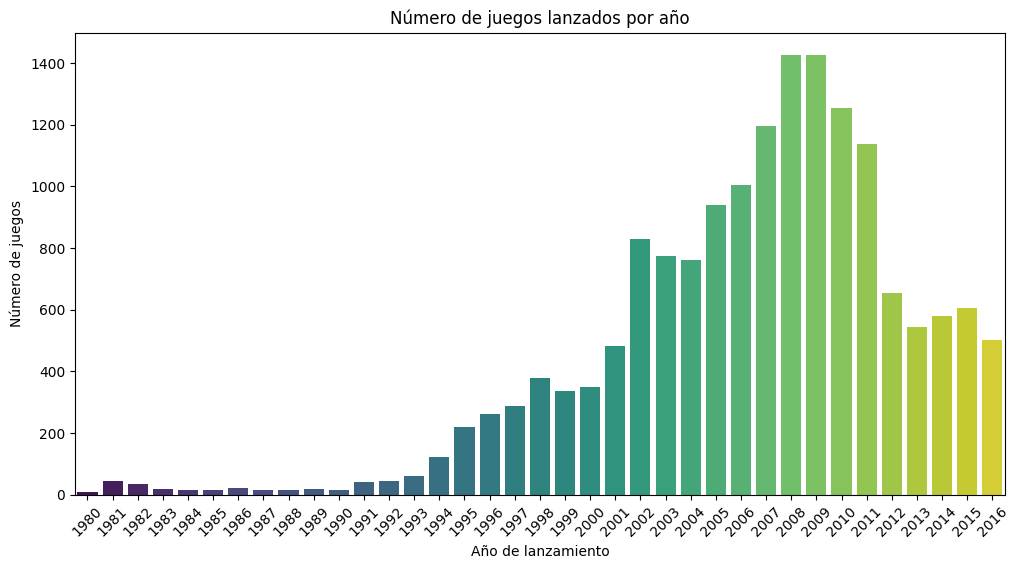

In [8]:
# Contar el número de juegos lanzados por año
games_per_year = games['year_of_release'].value_counts().sort_index()

# Visualizar la distribución de lanzamientos de juegos por año
plt.figure(figsize=(12, 6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, palette='viridis')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.show()

Los años con mayor número de lanzamientos de juegos fueron entre 2007 y 2011.


Esto indica un periodo de alta actividad en la industria de los videojuegos, posiblemente debido a la popularidad de consolas como la Xbox 360, PlayStation 3 y Wii, así como el auge de los juegos para dispositivos móviles y portátiles.

#### Ventas por plataforma

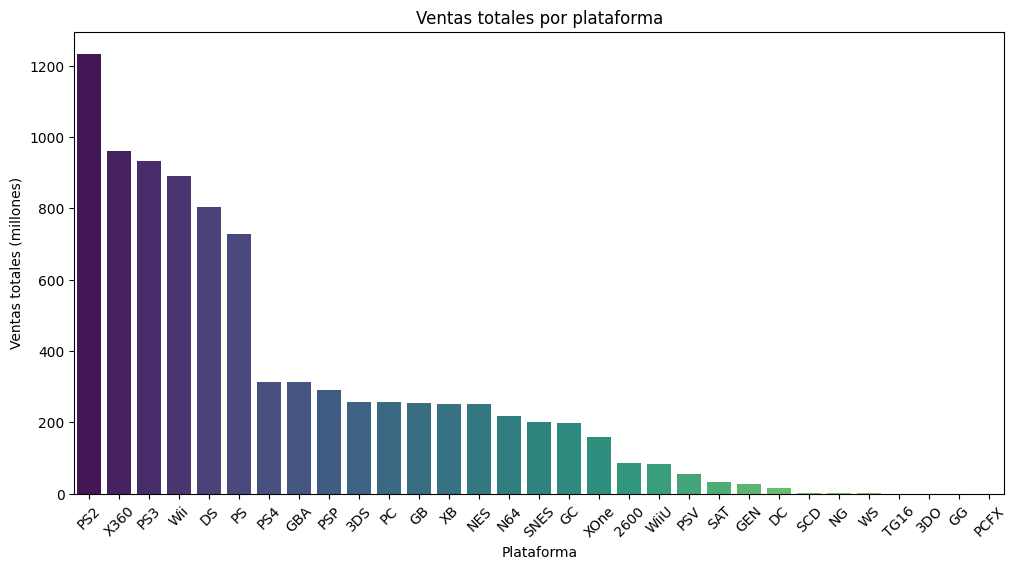

In [9]:
# Calcular ventas totales por plataforma
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Visualizar ventas totales por plataforma
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')
plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.show()

La gráfica muestra las ventas totales acumuladas para cada plataforma. Las plataformas con las mayores ventas son:

- PS2 (PlayStation 2)
- X360 (Xbox 360)
- PS3 (PlayStation 3)
- Wii
- DS (Nintendo DS)
- PS (PlayStation)

#### Distribución de ventas anuales por plataforma

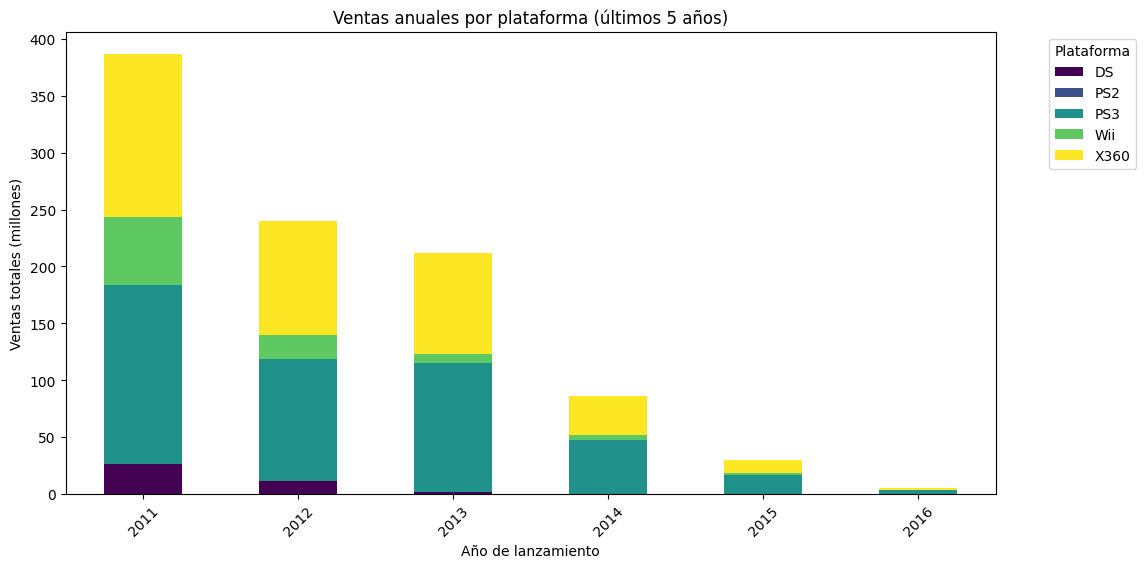

In [24]:
import matplotlib.pyplot as plt

# Seleccionar las plataformas con mayores ventas totales
top_platforms = platform_sales.index[:5]

# Filtrar datos para las plataformas seleccionadas
top_platform_data = games[games['platform'].isin(top_platforms)]

# Filtrar datos para los últimos 5 años
recent_data = top_platform_data[top_platform_data['year_of_release'] >= (top_platform_data['year_of_release'].max() - 5)]

# Calcular ventas anuales por plataforma
annual_platform_sales = recent_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

# Visualizar ventas anuales por plataforma con barras apiladas
annual_platform_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Ventas anuales por plataforma (últimos 5 años)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


#### Identificar plataformas en declive y nuevas

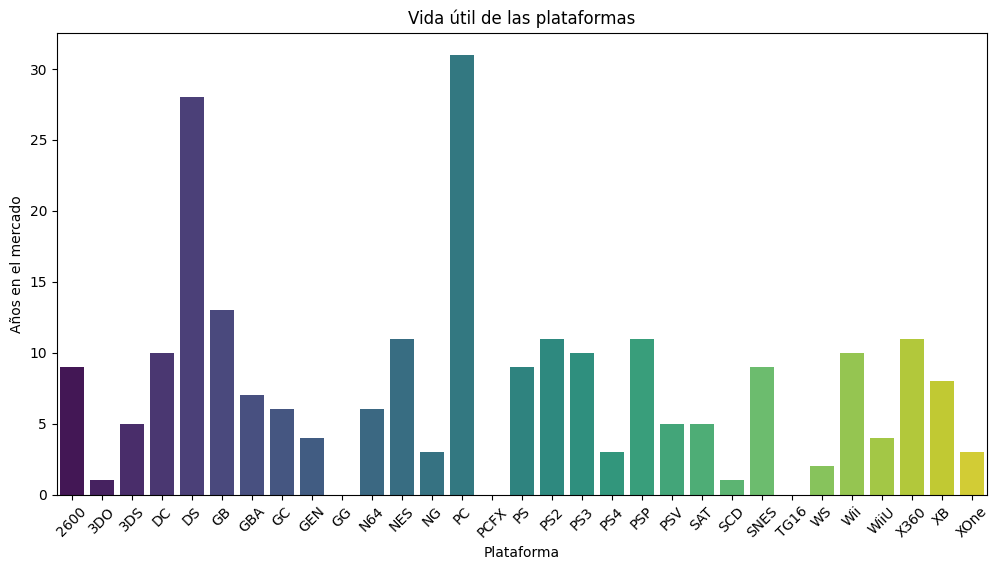

In [11]:
# Obtener los años de inicio y fin para cada plataforma
platform_lifecycle = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifecycle['lifespan'] = platform_lifecycle['max'] - platform_lifecycle['min']

# Visualizar la vida útil de las plataformas
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_lifecycle.index, y=platform_lifecycle['lifespan'], palette='viridis')
plt.title('Vida útil de las plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Años en el mercado')
plt.xticks(rotation=45)
plt.show()

#### Selección de período relevante para el modelo de 2017

Basado en los análisis anteriores, seleccionamos los datos relevantes para construir el modelo de 2017. Por ejemplo, si observamos que la mayoría de las plataformas siguen siendo relevantes en los últimos años, podemos limitar nuestro análisis a los últimos 10 años. Ademas seleccionamos las plataformas mas relevantes que son: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'PC'

In [12]:
# Filtrar datos para los últimos 10 años antes de 2017 (2007-2016)
relevant_data = games[games['year_of_release'] >= 2007]


#### Plataformas líderes en ventas

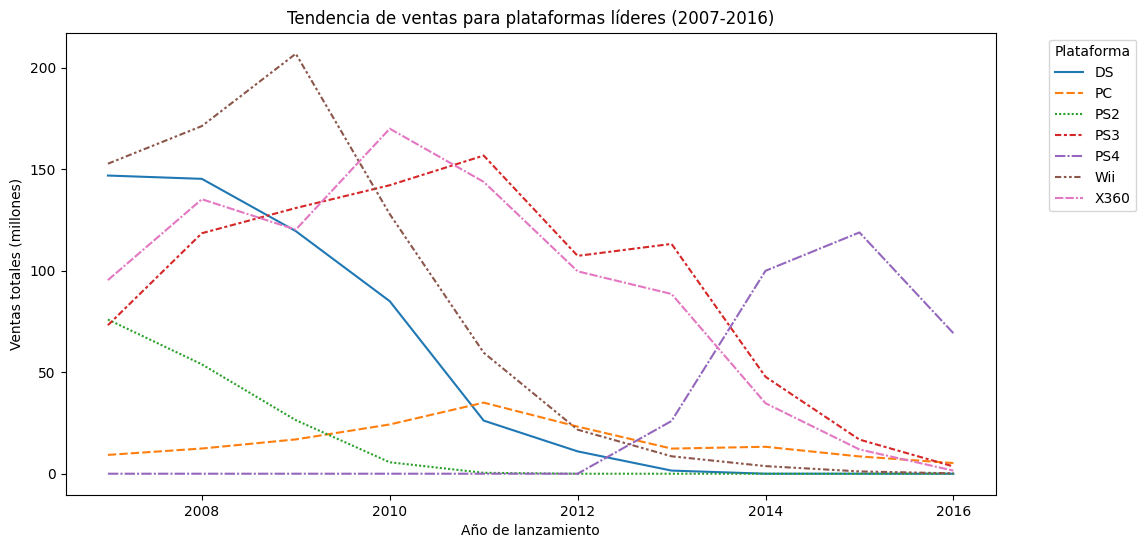

In [13]:
# Filtrar datos para las plataformas especificadas
selected_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'PC']
selected_platform_data = relevant_data[relevant_data['platform'].isin(selected_platforms)]

# Calcular ventas anuales para cada plataforma
annual_platform_sales = selected_platform_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

# Visualizar la tendencia de ventas para las plataformas especificadas
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_platform_sales)
plt.title('Tendencia de ventas para plataformas líderes (2007-2016)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1. Plataformas con Alto Pico de Ventas:
- Wii: Máximo impacto en un corto período.
- PS3 y X360: Ambos alcanzaron su pico máximo alrededor de 2010-2011.
- PS4: Continuó creciendo hasta su pico en 2015, mostrando un éxito sostenido.
2. Plataformas en Declive:
- PS2: Disminución significativa alrededor de 2010.
- DS: Disminución después de 2010.
- Wii: Rápida caída después de 2010.
3. Estabilidad en el Mercado:
- PC: Mantiene una estabilidad relativa sin grandes fluctuaciones, aunque con menores volúmenes de ventas comparado con las consolas de mayor éxito.

#### Diagrama de caja para ventas globales por plataforma

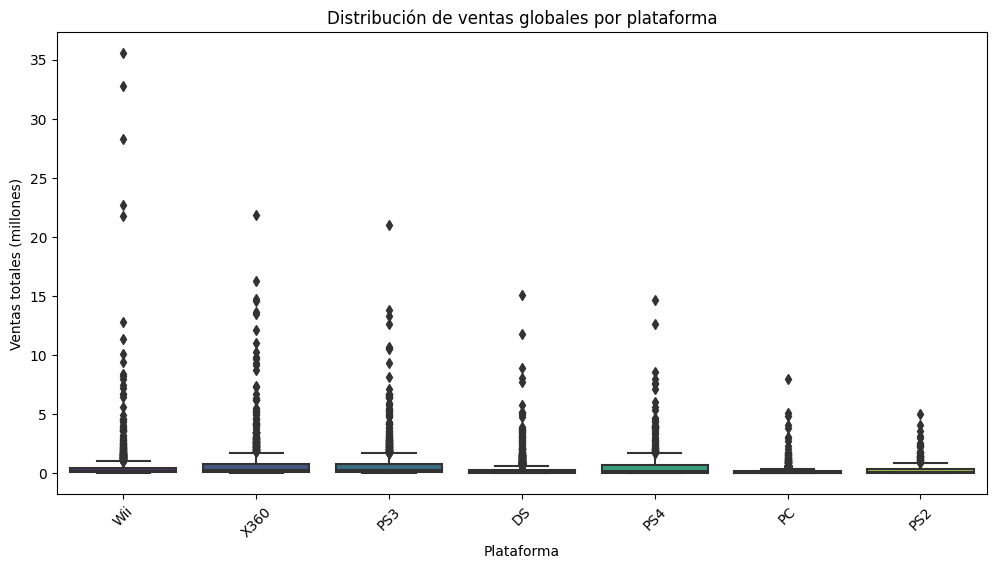

In [14]:
# Crear un diagrama de caja para las ventas globales por plataforma
plt.figure(figsize=(12, 6))
sns.boxplot(data=selected_platform_data, x='platform', y='total_sales', palette='viridis')
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.show()

#### Efecto de las reseñas en las ventas

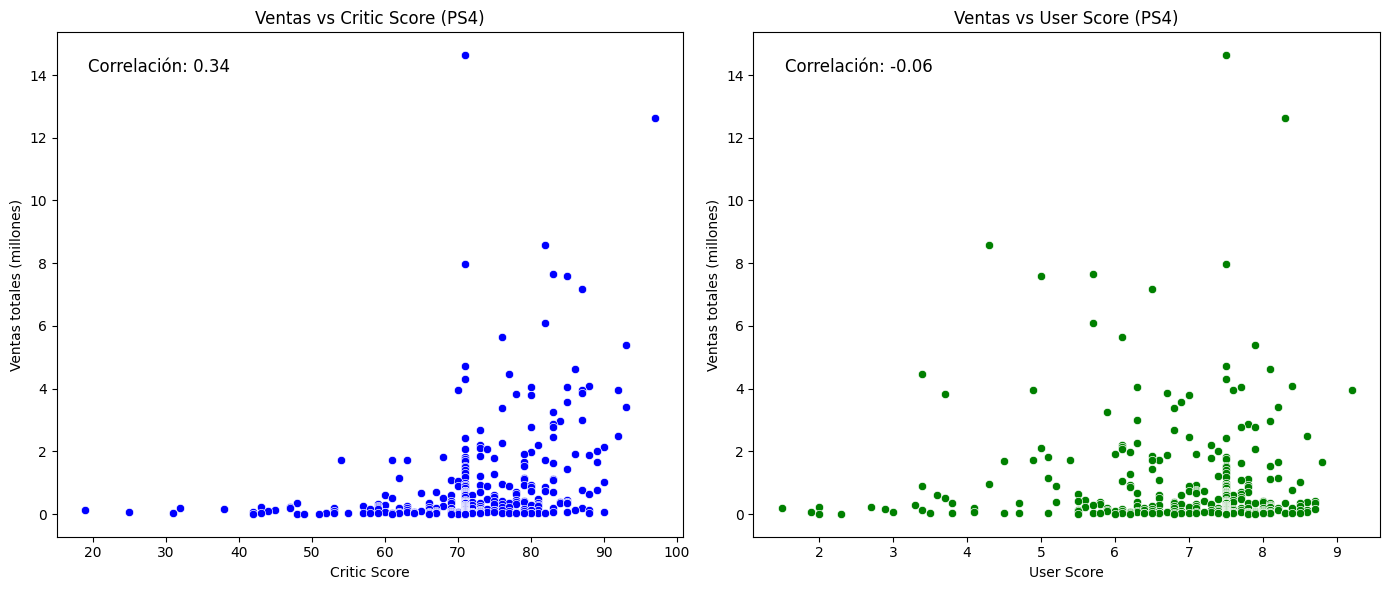

In [15]:
# Seleccionar una plataforma popular (por ejemplo, PS4)
platform = 'PS4'
platform_data = relevant_data[relevant_data['platform'] == platform]

# Crear gráficos de dispersión y calcular correlaciones
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de dispersión para Critic Score
sns.scatterplot(data=platform_data, x='critic_score', y='total_sales', ax=axs[0], color='blue')
axs[0].set_title(f'Ventas vs Critic Score ({platform})')
axs[0].set_xlabel('Critic Score')
axs[0].set_ylabel('Ventas totales (millones)')

# Calcular y mostrar correlación
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
axs[0].annotate(f'Correlación: {critic_corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, verticalalignment='top')

# Gráfico de dispersión para User Score
sns.scatterplot(data=platform_data, x='user_score', y='total_sales', ax=axs[1], color='green')
axs[1].set_title(f'Ventas vs User Score ({platform})')
axs[1].set_xlabel('User Score')
axs[1].set_ylabel('Ventas totales (millones)')

# Calcular y mostrar correlación
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
axs[1].annotate(f'Correlación: {user_corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

1. Impacto de las Reseñas de Críticos:

- Las reseñas de críticos parecen tener una influencia más notable en las ventas en comparación con las reseñas de usuarios. Un juego con una buena puntuación crítica tiende a vender más, lo que puede deberse a varios factores como la credibilidad de los críticos, la cobertura mediática y el boca a boca que puede generar una buena crítica.

2. Impacto de las Reseñas de Usuarios:

- Las reseñas de usuarios no muestran una correlación significativa con las ventas. Esto podría deberse a que las opiniones de los usuarios varían ampliamente y no siempre reflejan la calidad objetiva del juego. Además, otros factores como el marketing, la popularidad de la franquicia y la disponibilidad del juego pueden jugar un papel más importante en las decisiones de compra de los consumidores.

#### Comparación de Ventas de los Mismos Juegos en Diferentes Plataformas

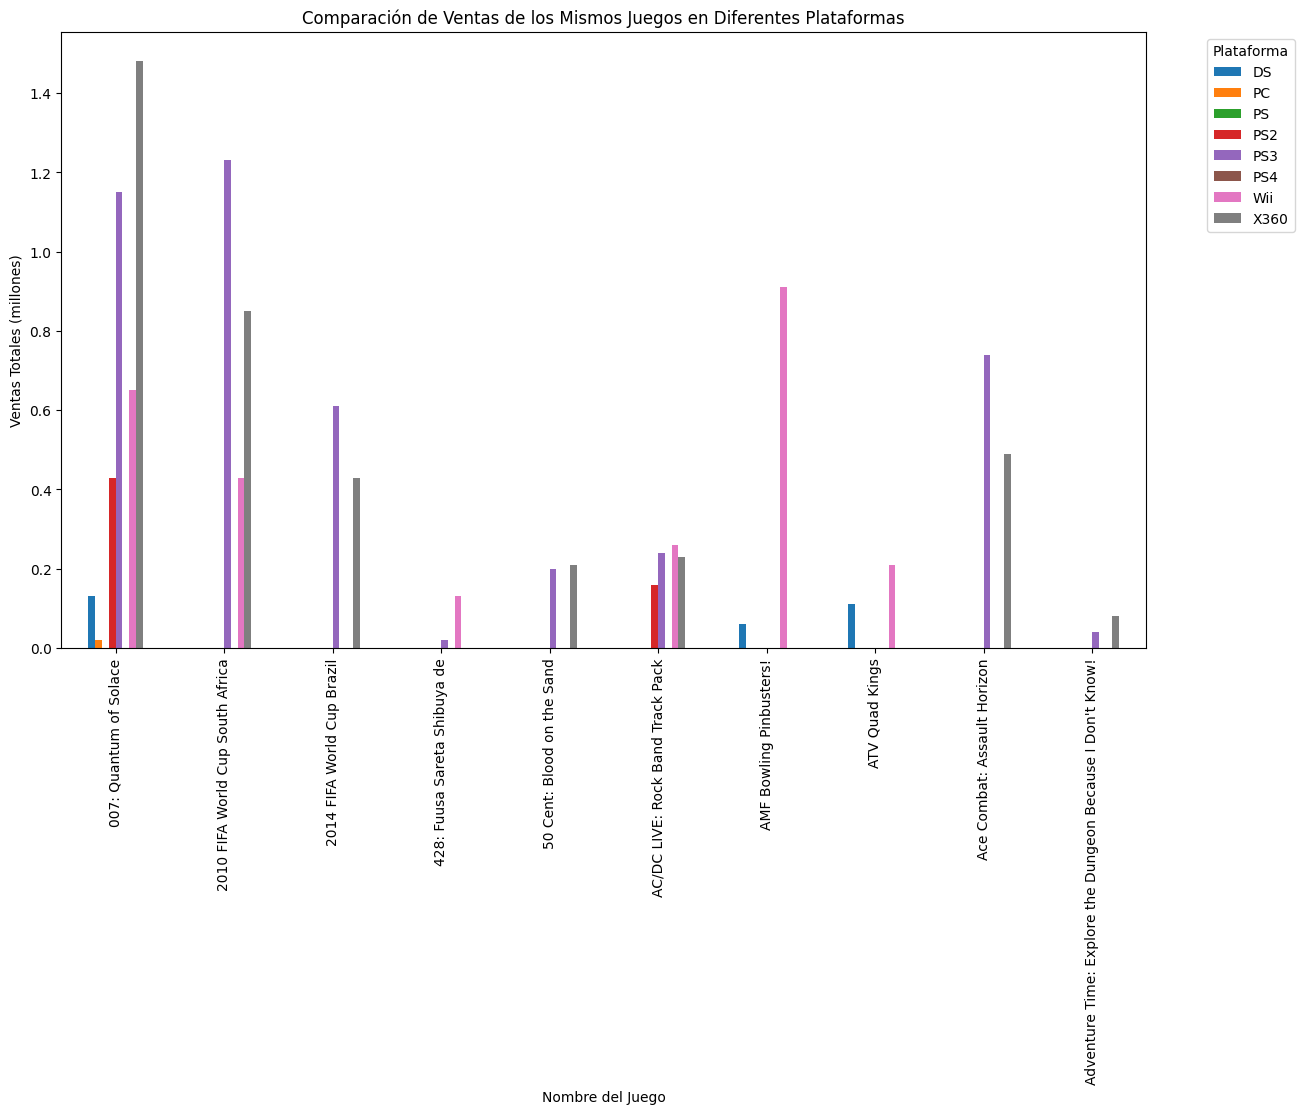

In [16]:
# Filtrar juegos lanzados en las plataformas seleccionadas
multi_platform_games = games[games['platform'].isin(selected_platforms)]

# Seleccionar juegos lanzados en múltiples plataformas
multi_platform_games = multi_platform_games[multi_platform_games.duplicated('name', keep=False)]

# Agrupar por nombre del juego y plataforma para sumar ventas
multi_platform_sales = multi_platform_games.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

# Visualizar la comparación de ventas para algunos juegos seleccionados
selected_games = multi_platform_sales.head(10)  # Seleccionar los primeros 10 juegos para visualizar
selected_games.plot(kind='bar', figsize=(14, 8))
plt.title('Comparación de Ventas de los Mismos Juegos en Diferentes Plataformas')
plt.xlabel('Nombre del Juego')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Es recomendable priorizar el desarrollo y lanzamiento de juegos en plataformas con una gran base de usuarios y fuertes ventas históricas como Microsoft(Xbox), SONY(PlayStation) y NINTENDO.

#### Análisis de la Distribución General de Juegos por Género

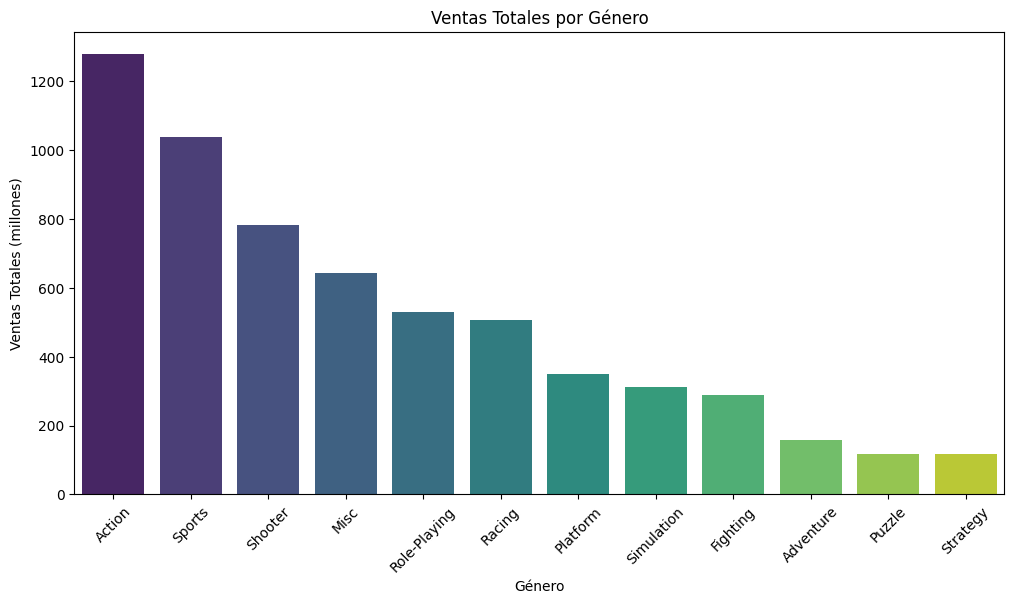

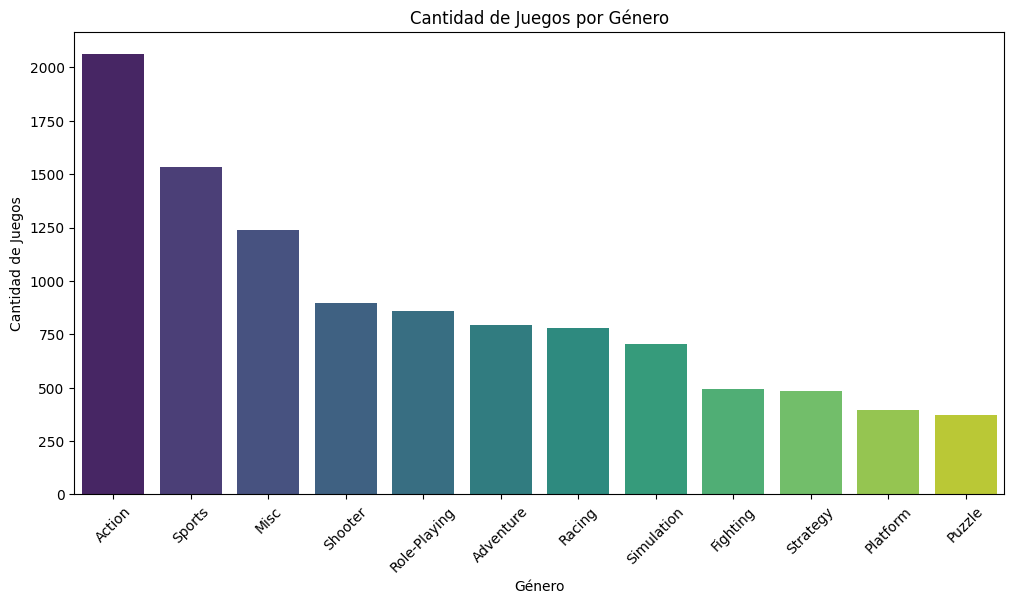

In [17]:
# Filtrar los datos para incluir solo las plataformas seleccionadas
selected_platform_data = games[games['platform'].isin(selected_platforms)]

# Calcular ventas totales por género
genre_sales = selected_platform_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualizar la distribución de ventas por género
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()

# Calcular la cantidad de juegos por género
genre_counts = selected_platform_data['genre'].value_counts()

# Visualizar la cantidad de juegos por género
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Cantidad de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()

Para maximizar las ventas, es recomendable centrarse en los géneros de acción, deportes y shooters, ya que tienen tanto una gran cantidad de lanzamientos como ventas significativas. Estos géneros deben ser una prioridad en el desarrollo de nuevos juegos y en las campañas de marketing.

### Perfil de usuario para cada región

In [18]:
# Agrupar por región y calcular las ventas totales para cada plataforma
na_platform_sales = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_platform_sales = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_platform_sales = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# Seleccionar las cinco plataformas principales para cada región
top_na_platforms = na_platform_sales.head(5)
top_eu_platforms = eu_platform_sales.head(5)
top_jp_platforms = jp_platform_sales.head(5)

# Agrupar por región y calcular las ventas totales para cada género
na_genre_sales = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
eu_genre_sales = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
jp_genre_sales = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# Seleccionar los cinco géneros principales para cada región
top_na_genres = na_genre_sales.head(5)
top_eu_genres = eu_genre_sales.head(5)
top_jp_genres = jp_genre_sales.head(5)


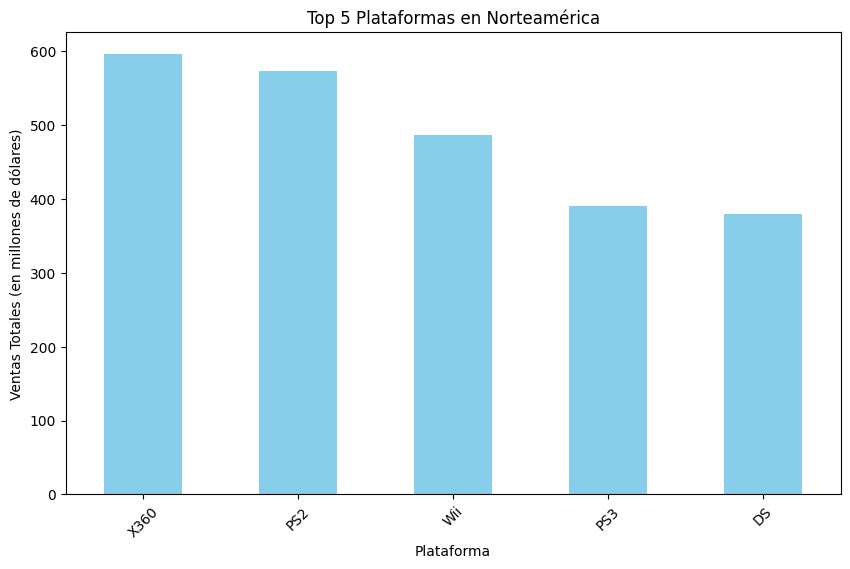

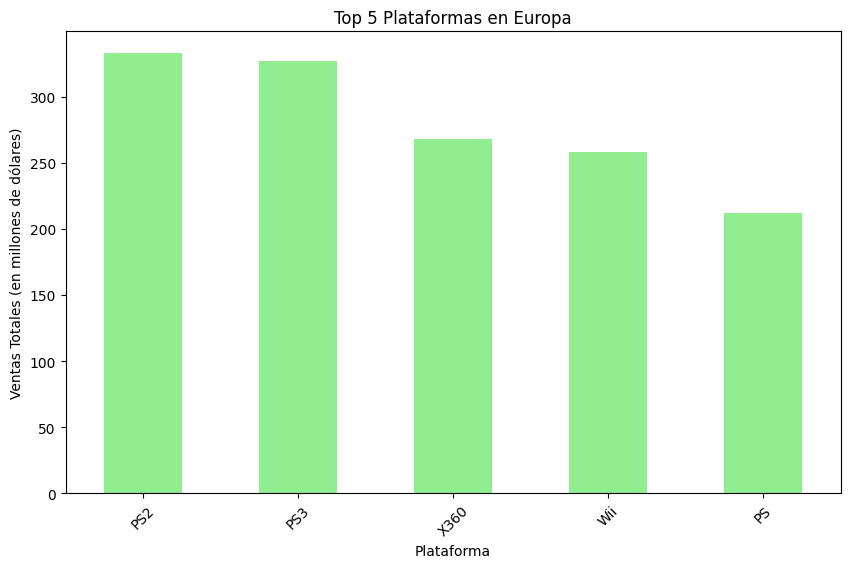

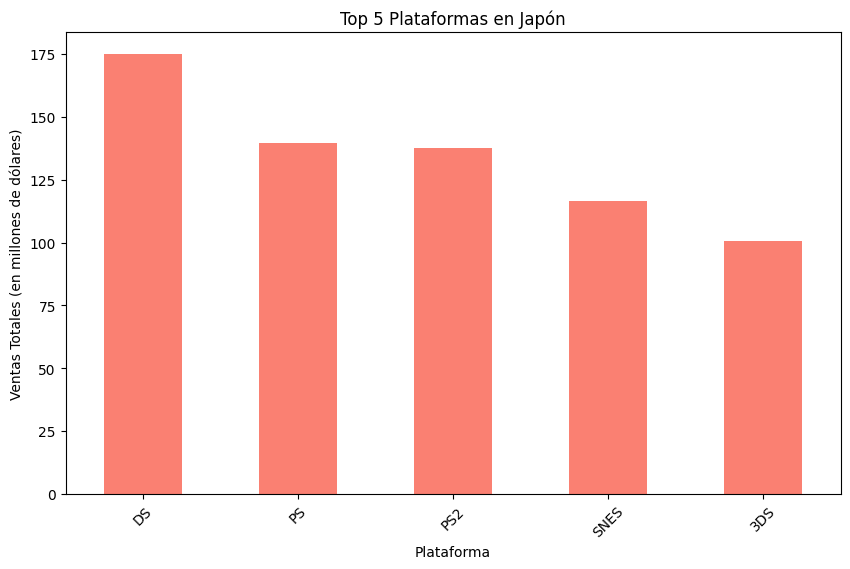

In [19]:
# Gráfico de barras para comparar las ventas totales de las cinco plataformas principales en Norteamérica
plt.figure(figsize=(10, 6))
top_na_platforms.plot(kind='bar', color='skyblue')
plt.title('Top 5 Plataformas en Norteamérica')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para comparar las ventas totales de las cinco plataformas principales en Europa
plt.figure(figsize=(10, 6))
top_eu_platforms.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Plataformas en Europa')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para comparar las ventas totales de las cinco plataformas principales en Japón
plt.figure(figsize=(10, 6))
top_jp_platforms.plot(kind='bar', color='salmon')
plt.title('Top 5 Plataformas en Japón')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.xticks(rotation=45)
plt.show()

Las variaciones en las cuotas de mercado de una región a otra se pueden observar al comparar las principales plataformas de cada región:

1. Norteamérica:

- La plataforma más destacada en Norteamérica es Xbox 360 (x360), seguida de cerca por PlayStation 2 (ps2) y Wii.
- Las ventas totales de las principales plataformas en Norteamérica son generalmente más altas en comparación con otras regiones, con Xbox 360 liderando el mercado.

2. Europa:

- PlayStation 2 (ps2) es la plataforma más prominente en Europa, seguida por PlayStation 3 (ps3).
- Aunque PlayStation 2 y PlayStation 3 son populares en Europa, las ventas totales son significativamente más bajas en comparación con Norteamérica.

3. Japón:

- Nintendo DS (ds) lidera el mercado en Japón, seguido por PlayStation (ps) y PlayStation 2 (ps2).
- Las ventas totales de las principales plataformas en Japón son considerablemente más bajas en comparación con Norteamérica y Europa, lo que sugiere preferencias diferentes en el mercado japonés.


En resumen, las variaciones en las cuotas de mercado de una región a otra pueden atribuirse a factores como preferencias culturales, estrategias de marketing y la disponibilidad de ciertas plataformas en cada región. Estos datos son importantes para Ice al planificar campañas publicitarias y estrategias de ventas específicas para cada región.

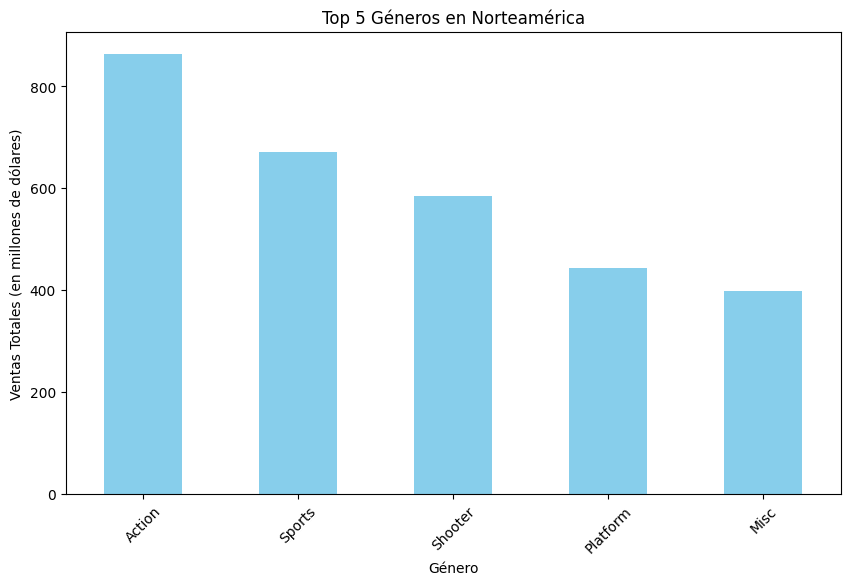

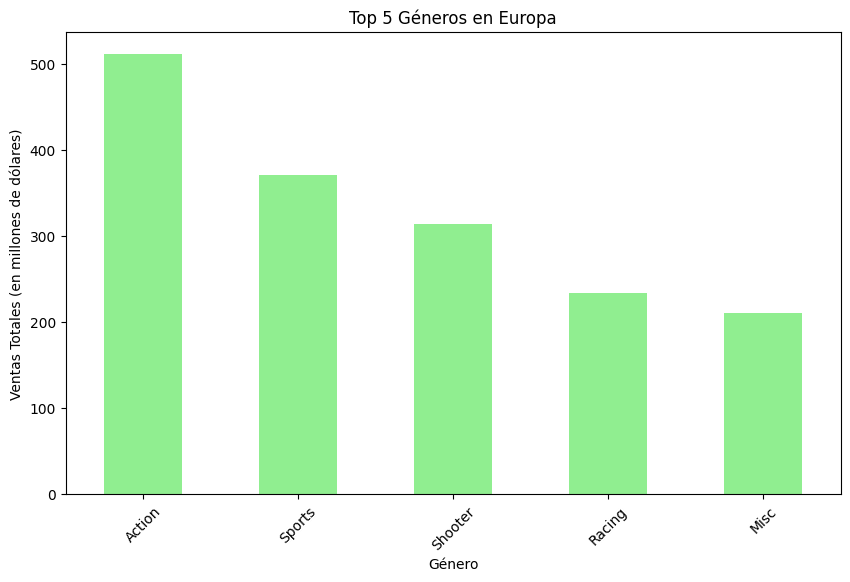

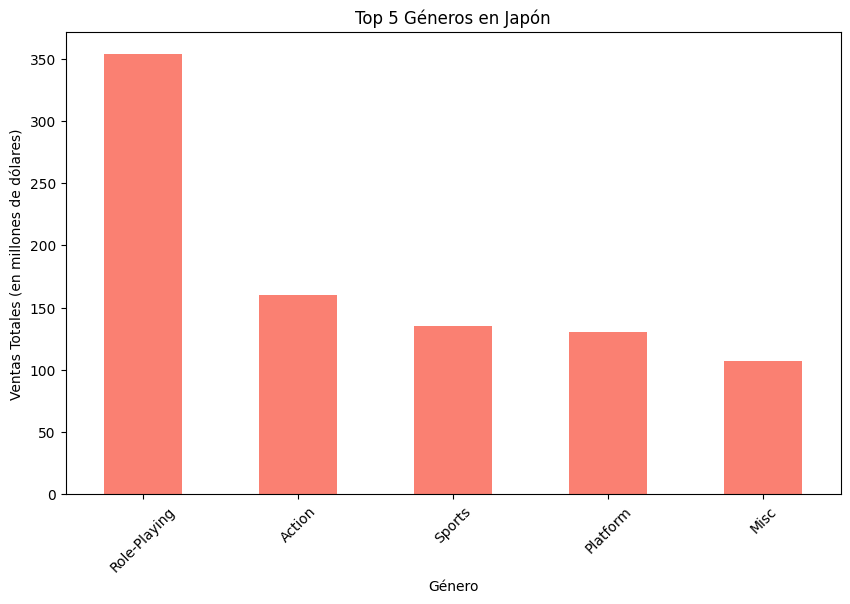

In [20]:
# Gráfico de barras para comparar las ventas totales de los cinco géneros principales en Norteamérica
plt.figure(figsize=(10, 6))
top_na_genres.plot(kind='bar', color='skyblue')
plt.title('Top 5 Géneros en Norteamérica')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para comparar las ventas totales de los cinco géneros principales en Europa
plt.figure(figsize=(10, 6))
top_eu_genres.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Géneros en Europa')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para comparar las ventas totales de los cinco géneros principales en Japón
plt.figure(figsize=(10, 6))
top_jp_genres.plot(kind='bar', color='salmon')
plt.title('Top 5 Géneros en Japón')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.xticks(rotation=45)
plt.show()

1. Norteamérica:

Action: Es el género más popular en Norteamérica, con ventas totales que superan los 800 millones de dólares. Esto sugiere una preferencia por juegos de acción entre los jugadores de esta región.

2. Europa:

Action: Al igual que en Norteamérica, Action es el género más popular en Europa, con ventas totales de más de 500 millones de dólares. Los jugadores europeos muestran un interés similar por los juegos de acción.

3. Japón:

Role-Playing: Es el género más popular en Japón, con ventas totales de alrededor de 350 millones de dólares. Los juegos de rol (RPG) tienen una gran base de seguidores en Japón y son altamente valorados en la cultura del juego japonesa.

Estas diferencias reflejan las preferencias culturales, los estilos de juego y las tendencias del mercado en cada región, lo que es crucial para Ice al planificar campañas publicitarias y estrategias de ventas dirigidas a audiencias específicas.

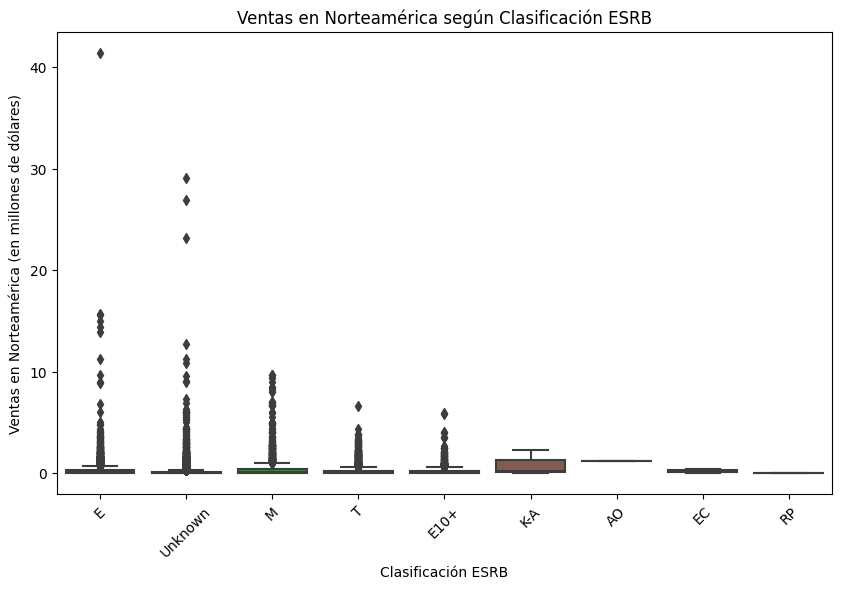

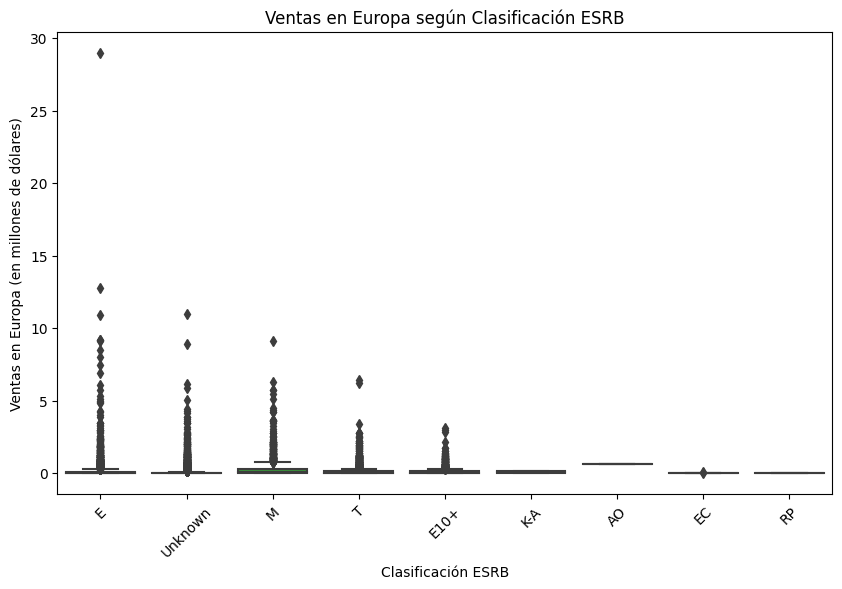

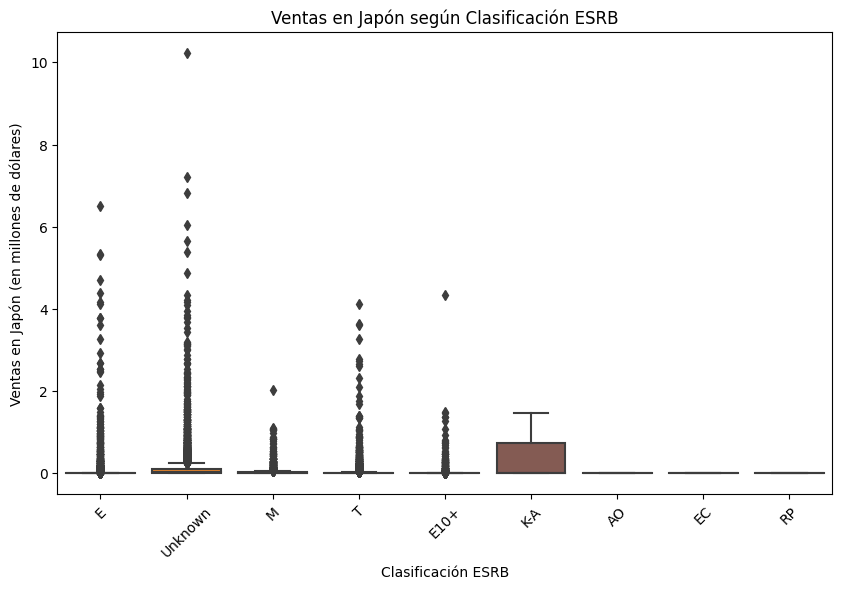

In [21]:
# Diagrama de caja para comparar las ventas según las clasificaciones de ESRB en Norteamérica
plt.figure(figsize=(10, 6))
sns.boxplot(data=games, x='rating', y='na_sales')
plt.title('Ventas en Norteamérica según Clasificación ESRB')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Norteamérica (en millones de dólares)')
plt.xticks(rotation=45)
plt.show()

# Diagrama de caja para comparar las ventas según las clasificaciones de ESRB en Europa
plt.figure(figsize=(10, 6))
sns.boxplot(data=games, x='rating', y='eu_sales')
plt.title('Ventas en Europa según Clasificación ESRB')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Europa (en millones de dólares)')
plt.xticks(rotation=45)
plt.show()

# Diagrama de caja para comparar las ventas según las clasificaciones de ESRB en Japón
plt.figure(figsize=(10, 6))
sns.boxplot(data=games, x='rating', y='jp_sales')
plt.title('Ventas en Japón según Clasificación ESRB')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas en Japón (en millones de dólares)')
plt.xticks(rotation=45)
plt.show()

### Prueba de hipotesis

####  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [27]:
# Filtrar las calificaciones de usuarios para Xbox One y PC
xbox_one_user_scores = games[games['platform'] == 'XOne']['user_score']
pc_user_scores = games[games['platform'] == 'PC']['user_score']

# Prueba de Levene para igualdad de varianzas
levene_statistic, levene_p_value = levene(xbox_one_user_scores, pc_user_scores)
print("Valor p de la prueba de Levene para Xbox One y PC:", levene_p_value)

# Determinar si las varianzas son iguales
equal_var = levene_p_value > 0.05

# Realizar la prueba t de Student para muestras independientes
t_statistic, p_value = ttest_ind(xbox_one_user_scores, pc_user_scores, equal_var=equal_var)
print("Valor p para la prueba de hipótesis 1:", p_value)

Valor p de la prueba de Levene para Xbox One y PC: 0.9598032879564389
Valor p para la prueba de hipótesis 1: 9.043321920431166e-05


####  Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [28]:
# Filtrar las calificaciones de usuarios para los géneros de Acción y Deportes
action_user_scores = games[games['genre'] == 'Action']['user_score']
sports_user_scores = games[games['genre'] == 'Sports']['user_score']

# Prueba de Levene para igualdad de varianzas
levene_statistic, levene_p_value = levene(action_user_scores, sports_user_scores)
print("Valor p de la prueba de Levene para Acción y Deportes:", levene_p_value)

# Determinar si las varianzas son iguales
equal_var = levene_p_value > 0.05

# Realizar la prueba t de Student para muestras independientes
t_statistic, p_value = ttest_ind(action_user_scores, sports_user_scores, equal_var=equal_var)
print("Valor p para la prueba de hipótesis 2:", p_value)

Valor p de la prueba de Levene para Acción y Deportes: 0.7767246731839648
Valor p para la prueba de hipótesis 2: 0.5653256242787754


1. Prueba de Hipótesis 1: Xbox One vs. PC

- Prueba de Levene (igualdad de varianzas):

  - Valor p: 0.9598
  - Interpretación: Dado que el valor p es mayor a 0.05, no rechazamos la hipótesis nula de que las varianzas son iguales. Esto significa que asumimos varianzas iguales (equal_var=True) en la prueba t de Student.
  
  
- Prueba t de Student:
  - Valor p: 9.0433e-05 (aproximadamente 0.00009)
  - Interpretación: Dado que el valor p es menor a 0.05, rechazamos la hipótesis nula de que las medias de las calificaciones de usuarios para Xbox One y PC son iguales. Esto sugiere que hay una diferencia significativa entre las calificaciones de usuarios para estos dos grupos.

2. Prueba de Hipótesis 2: Acción vs. Deportes

- Prueba de Levene (igualdad de varianzas):
  - Valor p: 0.7767
  - Interpretación: Dado que el valor p es mayor a 0.05, no rechazamos la hipótesis nula de que las varianzas son iguales. Esto significa que asumimos varianzas iguales (equal_var=True) en la prueba t de Student.
  
- Prueba t de Student:
  - Valor p: 0.5653
  - Interpretación: Dado que el valor p es mayor a 0.05, no rechazamos la hipótesis nula de que las medias de las calificaciones de usuarios para los géneros de Acción y Deportes son iguales. Esto sugiere que no hay una diferencia significativa entre las calificaciones de usuarios para estos dos géneros.

## Conclusiones generales

En este proyecto, trabajamos para la tienda online Ice que vende videojuegos en todo el mundo. Nuestro objetivo fue identificar patrones que determinen si un juego tiene éxito o no, lo que nos permitiría detectar proyectos prometedores y planificar campañas publicitarias efectivas.

Para lograr este objetivo, seguimos una serie de pasos:

1. Preparación de los datos: Comenzamos abriendo el archivo de datos y realizando un estudio inicial de la información. Luego, realizamos varias tareas para preparar los datos, como reemplazar los nombres de las columnas por minúsculas, convertir los datos en los tipos necesarios y manejar los valores ausentes de manera adecuada. También calculamos las ventas totales para cada juego y las colocamos en una columna separada.


2. Análisis de los datos: En esta etapa, analizamos los datos para comprender mejor la industria de los videojuegos. Exploramos cuántos juegos fueron lanzados en diferentes años, cómo varían las ventas entre diferentes plataformas, qué plataformas son líderes en ventas y cómo las reseñas de usuarios y profesionales afectan las ventas. También examinamos la distribución de los juegos por género y su impacto en las ventas.


3. Creación de un perfil de usuario para cada región: Determinamos las cinco plataformas principales y los cinco géneros principales para cada región (Norteamérica, Europa y Japón), y analizamos si las clasificaciones de ESRB afectan las ventas en regiones individuales.


4. Prueba de hipótesis: Formulamos y probamos dos hipótesis: la primera sobre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC, y la segunda sobre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes. Utilizamos la prueba t de Student para muestras independientes y un nivel de significancia (alfa) de 0.05 para probar las hipótesis.